# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement:

How can the College Board increase the participation rate in New York State?

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [188]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [189]:
#Code:
sat_2017=pd.read_csv('../data/sat_2017.csv')
act_2017=pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [190]:
#Code: 2017 SAT data
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [191]:
#Code: 2017 ACT data
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

- Answer: The SAT data contains state-level data for all 50 US states and the District of Colombia. Variables include the state name, participation rate as a percentage, average evidence-based reading and writing score, average math score, and average total scores.

- Similarly, the ACT data contains state-level data for al 50 US states, the District of Colombia, and a National Aggregate. Variables in the participation rate as a percentage, average English score, averagem math Score, average reading score, average science score, and a composite. 

#### 4a. Does the data look complete? 

- Answer: The data appear complete for each state, DC, and the national aggregate (ACT-only). 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)


- Answer: 

EDIT THIS LATER
**SAT**  “The highest SAT score you can possibly earn is 1600. The lowest SAT score is 400. ... Each SAT section is scored between 200 and 800 points.”
**ACT**  “Each section is scored out of 36 points. Your composite ACT score is an average of your 4 section scores.”
Source: princetonreview.com, 25 March 2020

Comment: When we say possible, do we mean that one can achieve on the tests or within the dataset?<br>

___Lowest SAT scores:___<br>
_ERW:_ 482 (District of Colombia)<br>
_Math:_ 52 (Maryland) *This seems erroneous, given the distribution of scores among other states<br>
_Total:_ 950 (District of Colombia)<br>
<br>
___Highest SAT scores:___<br>
_ERW:_ 644 (Minnesota) *This seems misleading, given the 3% participation rate<br>
_Math:_ 651 (Minnesota) *This seems misleading, given the 3% participation rate<br>
_Total:_ 1295 (Minnesota) *This seems misleading, given the 3% participation rate<br>
<br>
___Lowest ACT Scores:___<br>
_English:_ 16.3 (Nevada)<br>
_Math:_ 18.0 (Nevada)<br>
_Reading:_ 18.1 (Nevada)<br>
_Science:_ 2.3 (Maryland) *This seems questionable, given the distribution of scores among other states<br>
_Composite:_ 17.8 (Composite)<br>
<br>
___Highest ACT Scores:___<br>
_English:_ 24.2 (Maine) *Only 8% participation<br>
_Math:_ 24.0 (Maine) *Only 8% participation<br>
_Reading:_ 24.8 (Maine) *Only 8% participation<br>
_Science:_ 23.8 (Michigan)<br>
_Composite:_ 24.2 (New York)<br>


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [192]:
#code
sat_2017.at[20,['Math']] = 524    # Fix Maryland SAT Math Score
act_2017.at[21,['Science']]=23.2  # Fix Maryland ACT Science score

# Wyoming also has an incorrect ACT Composite entry. The fix is below.

#### 5. What are your data types? 
Display the data types of each feature. 

In [193]:
#code
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [194]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

- Answer: Participation is listed as a percent, and should be changed to a float value. Additionally, the ACT composite score should be float, but a value was incorrectly entered for Wyoming.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [195]:
#code
sat_2017['Participation']=sat_2017['Participation'].str.rstrip('%').astype(float)
act_2017['Participation']=act_2017['Participation'].str.rstrip('%').astype(float)
sat_2017['Participation']=sat_2017['Participation']/100
act_2017['Participation']=act_2017['Participation']/100
# Can't get function to work, but aim to come back to this.
#def strip_pct(scores):

#   for score in scores:
#       score=score.str.rstrip('%').astype(float)
        

- Fix any individual values preventing other columns from being the appropriate type.

In [196]:
#code
act_2017.at[51,['Composite']]=20.2    # Change Wyoming Value
act_2017['Composite'] = act_2017['Composite'].astype(float)     # Change 'Composite type to float'
act_2017.dtypes     # Check data types


State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

In [197]:
#Code:
print(list(sat_2017.columns))
print(list(act_2017.columns))

['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math', 'Total']
['State', 'Participation', 'English', 'Math', 'Reading', 'Science', 'Composite']


- Display the data types again to confirm they are correct.

In [198]:
#Code:
print(act_2017.dtypes)
print(sat_2017.dtypes)

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object
State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [199]:
# Rename and Standardize Columns

sat_2017 = sat_2017.rename(columns={'State': 'state',
                                    'Participation': 'sat2017_partic', 
                                    'Evidence-Based Reading and Writing': 'sat2017_erw', 
                                    'Math': 'sat2017_math',
                                    'Total': 'sat2017_total'})

act_2017 = act_2017.rename(columns={'State':'state',
                                     'Participation': 'act2017_partic',
                                     'English':'act2017_english',
                                     'Math':'act2017_math',
                                     'Reading':'act2017_reading',
                                     'Science':'act2017_sci',
                                     'Composite':'act2017_comp'})

# Code adopted from pandas.pydata.org documentation examples



In [200]:
act_2017.dtypes

state               object
act2017_partic     float64
act2017_english    float64
act2017_math       float64
act2017_reading    float64
act2017_sci        float64
act2017_comp       float64
dtype: object

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---| 
|sat2017_state|object|SAT|Name of US State|
|sat2017_partic|float64|SAT|Percent of Students Participating| 
|sat2017_erw|int64|SAT|Average Evidence-based Reading and Writing Score| 
|sat2017_math|int64|SAT|Average Math Score| 
|sat2017_total|int64|SAT|Average Total Score| 
|act2017_sate|object|ACT|Name of US State|
|act2017_partic|float64|ACT|Percent of Students Participating|
|act2017_english|float64|ACT|Average English Score|
|act2017_math|float64|ACT|Average Math Score|
|act2017_reading|float64|ACT|Average Reading Score|
|act2017_sci|float64|ACT|Average Science Score|
|act2017_comp|float64|ACT|Average Composite Score|



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [201]:
# Drop National Aggregate row from 2017 ACT data
act_2017.drop([0], inplace=True)
act_2017.reset_index(inplace=True)
act_2017.shape

(51, 8)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [202]:
#Code:
combined_2017=sat_2017.merge(act_2017, left_on='state', right_on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [203]:
#code
combined_2017.to_csv('../data/conbined_2017.csv')

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [204]:
# C Read in 2018 Data:
sat_2018=pd.read_csv('../data/sat_2018.csv')
act_2018=pd.read_csv('../data/act_2018.csv')


In [205]:
# Strip '%' from Participation and change type to float

sat_2018['Participation']=sat_2018['Participation'].str.rstrip('%').astype(float)
act_2018['Participation']=act_2018['Participation'].str.rstrip('%').astype(float)
sat_2018['Participation']=sat_2018['Participation']/100
act_2018['Participation']=act_2018['Participation']/100

# Fix DC Name typo
act_2018.at[8,['State']]='District of Columbia'

# Drop duplicate Maine Row, rese index
act_2018.drop(index=19, inplace=True)
act_2018.reset_index(inplace=True)

# Code adapted from above

In [206]:
# Rename and Standardize Columns

sat_2018 = sat_2018.rename(columns={'State': 'state',
                                    'Participation': 'sat2018_partic', 
                                    'Evidence-Based Reading and Writing': 'sat2018_erw', 
                                    'Math': 'sat2018_math',
                                    'Total': 'sat2018_total'})

act_2018 = act_2018.rename(columns={'State':'state',
                                     'Participation': 'act2018_partic',
                                     'Composite':'act2018_comp'})

# Code adopted from pandas.pydata.org documentation examples

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [207]:
combined_2018 = pd.merge(act_2018, sat_2018, on='state', how='left')

In [208]:
combined_2018.to_csv('../data/conbined_2018.csv')

In [209]:
combined_2017_18 = pd.merge(combined_2018, combined_2017, on='state', how='left')

In [210]:
combined_2017_18.to_csv('../data/conbined_2017_18.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [211]:
#Code:
combined_2017_18.describe().T

,count,mean,std,min,25%,50%,75%,max
index_x,51.0,25.627451,15.277383,0.00,12.500,26.00,38.500,51.0
act2018_partic,51.0,0.617255,0.340371,0.07,0.285,0.66,1.000,1.0
act2018_comp,51.0,21.496078,2.111583,17.70,19.950,21.30,23.650,25.6
sat2018_partic,51.0,0.457451,0.373143,0.02,0.045,0.52,0.775,1.0
sat2018_erw,51.0,563.686275,47.502627,480.00,534.500,552.00,610.500,643.0
sat2018_math,51.0,556.235294,47.772623,480.00,522.500,544.00,593.500,655.0
sat2018_total,51.0,1120.019608,94.155083,977.00,1057.500,1098.00,1204.000,1298.0
sat2017_partic,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat2017_erw,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat2017_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [212]:
#Code:
def mstd(state_scores):
    var1 = 0
    state_mean = state_scores.mean()
    for i in state_scores:
        var1 += (i - state_mean)**2
        
    var = sum(var1/len(state_scores))
    
    std = np.sqrt(var)
    
    return std

mask = combined_2017_18['sat2018_total']

mstd('mask')


AttributeError: 'str' object has no attribute 'mean'

In [ ]:
np.std(combined_2017_18)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [264]:
#Code: RETURN TO THIS

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

- Answer: Probably not. Numpy uses the population standard deviation by default, while pandas uses the sample standard deviation

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT? HIGHEST: DC, Michigan, Connecticut, Delaware (100%). LOWEST: North Dakota, Mississippi, Iowa (2%)
    - 2018 SAT? HIGHEST: Colorada, Connecticut, Delaware, Michigan, Idaho (100%). LOWEST: North Dakota (2%)
    - 2017 ACT? HIGHEST: Alabama, Kentucky, Wisconsin, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Montana, Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Arkansas, Colorado. LOWEST: Maine (8%)	
    - 2018 ACT? HIGHEST: Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina, Nevada, Nebraska, Montana, Mississippi, Louisiana, Missouri, Wyoming, Arkansas (100%). LOWEST: Maine (7%)
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT? HIGHEST: Minnesota (1295), Wisconsin (1291), Iowa (1275), Missouri (1271). LOWEST: DC (950), Delware (996), Michigan (1005)
    - 2018 SAT? HIGHEST: Minnesota (1298), Wisconsin (1294), North Dakota (1283), Iowa (1265). LOWEST: West Virginia (999), Delaware (998), District of Columbia (977).
    - 2017 ACT? HIGHEST: New Hampshire (25.5), Massachusetts (25.4), Connecticut (25.2). LOWEST: South Carolina	(18.7), Mississippi	(18.6), Nevada (17.8).
    - 2018 ACT? HIGHEST: Connecticut (25.6), Massachusetts (25.5) New Hampshire	(25.1). LOWEST: Mississippi	(18.6), South Carolina (18.3), Nevada (17.7).

- Do any states with 100% participation on a given test have a rate change year-to-year?
    - SAT 100% in 2017 but not 2018: No states
    - SAT not 100% in 2017 but 100% in 2018: Colroado, Idaho
    - ACT 100% in 2017 but not in 2018: Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming
   -  ACT not 100% in 2017 but 100% in 2018: No states

- Do any states show have >50% participation on *both* tests either year?
     - Florida, Georgia, Hawaii, North Carolina, South Carolina


Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [220]:
# Comments on findings listed in above markdown cell.

# Filter for high/low participation rates:

combined_2017_18[['state','sat2017_partic']].sort_values(ascending=False, by='sat2017_partic')
#combined_2017_18[['state','sat2018_partic']].sort_values(ascending=False, by='sat2018_partic')
#combined_2017_18[['state','act2017_partic']].sort_values(ascending=False, by='act2017_partic')
#combined_2017_18[['state','act2018_partic']].sort_values(ascending=False, by='act2018_partic')
#combined_2017_18[['state','sat2017_total']].sort_values(ascending=False, by='sat2017_total')
#combined_2017_18[['state','sat2018_total']].sort_values(ascending=False, by='sat2018_total')
#combined_2017_18[['state','act2017_comp']].sort_values(ascending=False, by='act2017_comp')
#combined_2017_18[['state','act2018_comp']].sort_values(ascending=False, by='act2018_comp')

# Code adapted from GA DSI DC Flex lessonbook 01-pandas-intro

In [221]:
# 100% in 2017, < 100% in 2018: SAT
combined_2017_18[(combined_2017_18['sat2017_partic'] == 1.00) & 
          (combined_2017_18['sat2018_partic'] != 1.00)]['state']
# < 100% in 2017, 100% in 2018: SAT
combined_2017_18[(combined_2017_18['sat2017_partic'] != 1.00) & 
          (combined_2017_18['sat2018_partic'] == 1.00)]['state']
# 100% in 2017, < 100% in 2018: ACT
combined_2017_18[(combined_2017_18['act2017_partic'] == 1.00) & 
          (combined_2017_18['act2018_partic'] != 1.00)]['state']
# < 100% in 2017, 100% in 2018: ACT
combined_2017_18[(combined_2017_18['act2017_partic'] != 1.00) & 
          (combined_2017_18['act2018_partic'] == 1.00)]['state']

# Mask code adapted from GA DSI DC Flex lesson book 01-pandas-after-day-1

27    Nebraska
35        Ohio
Name: state, dtype: object

In [284]:
# > 50% participation on both tests either year
combined_2017_18[(combined_2017_18['sat2017_partic'] > .5) & 
          (combined_2017_18['act2017_partic'] > .5) |
          (combined_2017_18['sat2018_partic'] > .5) & 
          (combined_2017_18['act2018_partic'] > .5)]['state']

9     Florida
10    Georgia
11     Hawaii
Name: state, dtype: object

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

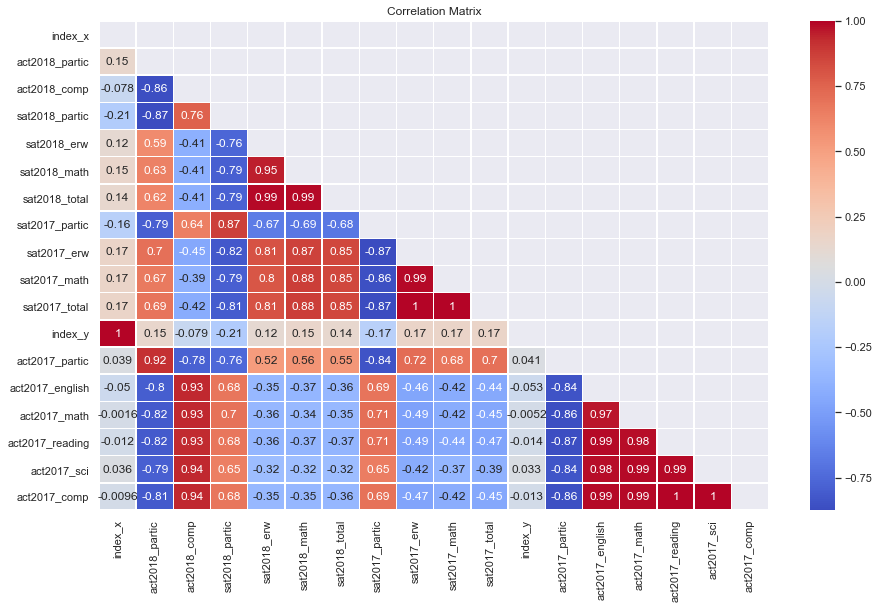

In [231]:
plt.figure(figsize=(15,9))
sns.set(font_scale=1)
plt.title('Correlation Matrix')
mask = np.triu(combined_2017_18.corr())
ax = sns.heatmap(combined_2017_18.corr(), annot=True, cmap='coolwarm', 
                 linewidths=.5, mask=mask);

# Code adapted from GA DSI lesson 2.02 principles-of-visualization

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
# NEED TO COME BACK TO THIS

def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

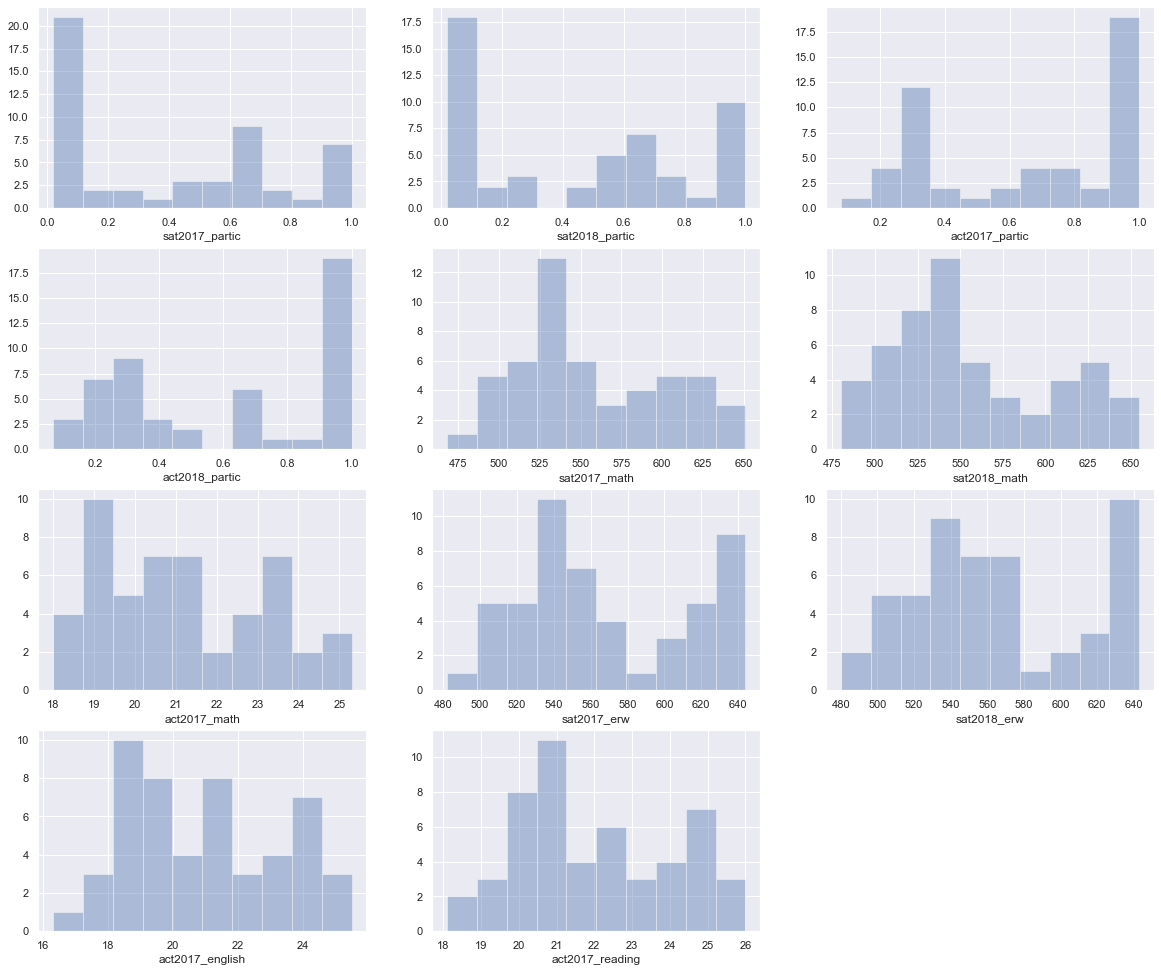

In [292]:
plt.figure(figsize=(20, 17))
plt.subplot(4,3,1)
sns.distplot(combined_2017_18['sat2017_partic'], bins=10, kde=False)
plt.subplot(4,3,2)
sns.distplot(combined_2017_18['sat2018_partic'], bins=10,kde=False)
plt.subplot(4,3,3)
sns.distplot(combined_2017_18['act2017_partic'], bins=10, kde=False)
plt.subplot(4,3,4)
sns.distplot(combined_2017_18['act2018_partic'], bins=10, kde=False)
plt.subplot(4,3,5)
sns.distplot(combined_2017_18['sat2017_math'], bins=10, kde=False)
plt.subplot(4,3,6)
sns.distplot(combined_2017_18['sat2018_math'], bins=10, kde=False)
plt.subplot(4,3,7)
sns.distplot(combined_2017_18['act2017_math'], bins=10, kde=False)
plt.subplot(4,3,8)
sns.distplot(combined_2017_18['sat2017_erw'], bins=10, kde=False)
plt.subplot(4,3,9)
sns.distplot(combined_2017_18['sat2018_erw'], bins=10, kde=False)
plt.subplot(4,3,10)
sns.distplot(combined_2017_18['act2017_english'], bins=10, kde=False)
plt.subplot(4,3,11)
sns.distplot(combined_2017_18['act2017_reading'], bins=10, kde=False);

# Code adapted from GA DSI lesson 2.02 principles-of-visualization

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

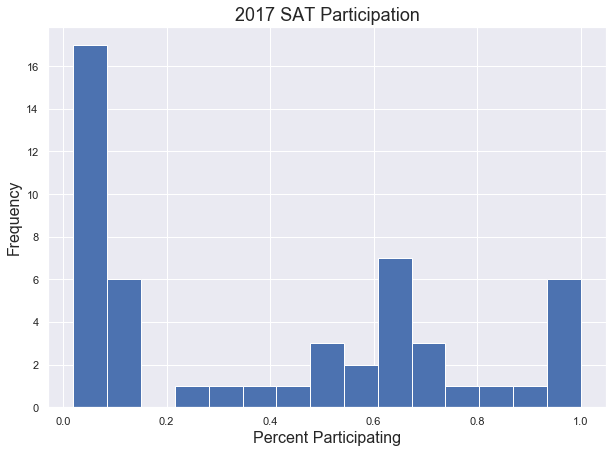

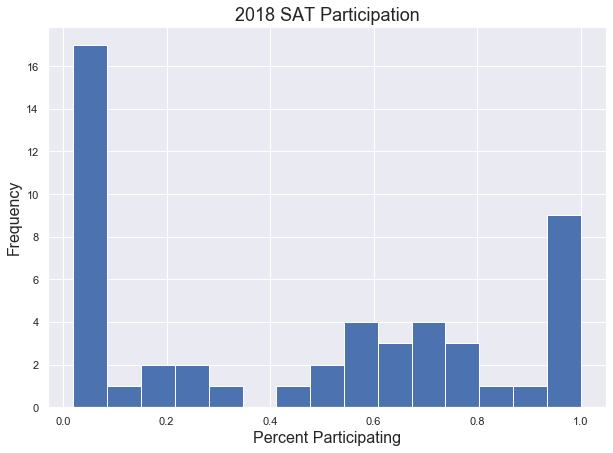

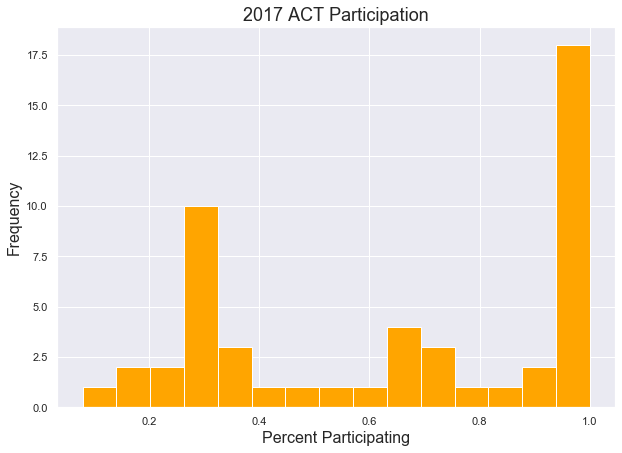

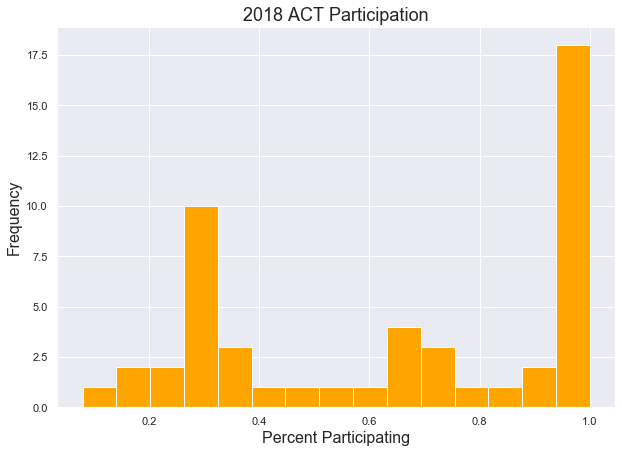

In [283]:
# 2017 SAT Participation

combined_2017_18.hist('sat2017_partic', bins= 15,figsize=(10, 7))
plt.xlabel('Percent Participating', fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.title('2017 SAT Participation', fontsize=18)
plt.savefig('2017_SAT_part.png')


# 2018 SAT Participation
combined_2017_18.hist('sat2018_partic', bins= 15, figsize=(10, 7))
plt.xlabel('Percent Participating', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('2018 SAT Participation' ,fontsize=18)
plt.savefig('2018_SAT_part.png')

# 2017 ACT Participation
combined_2017_18.hist('act2017_partic', bins= 15,figsize=(10, 7), color=('Orange'))
plt.xlabel('Percent Participating', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('2017 ACT Participation', fontsize=18)
plt.savefig('2017_ACT_part.png')

# 2018 ACT Participation
combined_2017_18.hist('act2017_partic', bins= 15, figsize=(10, 7), color=('orange'))
plt.xlabel('Percent Participating', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('2018 ACT Participation', fontsize=18)
plt.savefig('2018_ACT_part.png');

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, '2018 ACT Compisite Scores')

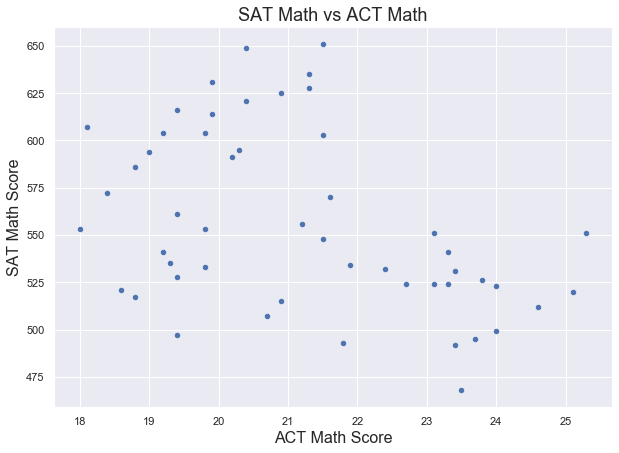

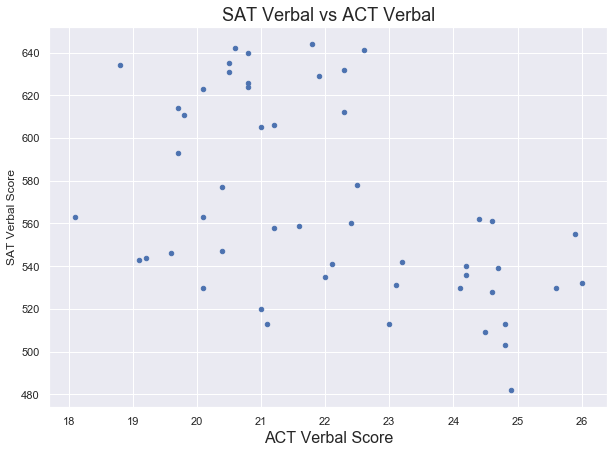

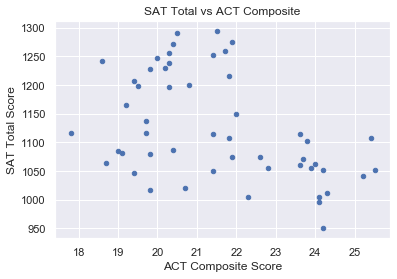

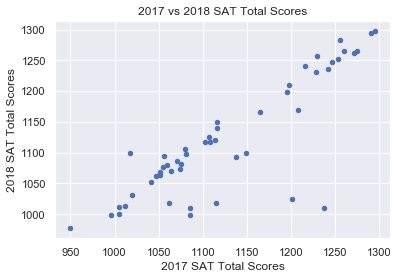

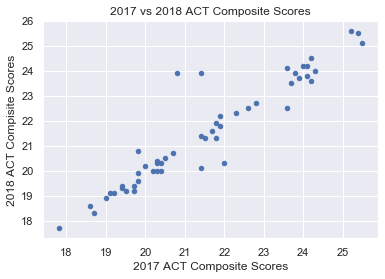

In [289]:
# Scatterplots

combined_2017_18.plot(kind='scatter',x='act2017_math',y='sat2017_math', figsize=(10, 7 ))
plt.title('SAT Math vs ACT Math',fontsize=18)
plt.xlabel('ACT Math Score',fontsize=16)
plt.ylabel('SAT Math Score',fontsize=16)
plt.savefig('2017_SATvACT_math.png')

combined_2017_18.plot(kind='scatter',x='act2017_reading',y='sat2017_erw', figsize=(10, 7))
plt.title('SAT Verbal vs ACT Verbal',fontsize=18)
plt.xlabel('ACT Verbal Score',fontsize=16)
plt.ylabel('SAT Verbal Score')
plt.savefig('2017_SATvACT_verbal.png')
                      
combined_2017_18.plot(kind='scatter',x='act2017_comp',y='sat2017_total', )
plt.title('SAT Total vs ACT Composite')
plt.xlabel('ACT Composite Score')
plt.ylabel('SAT Total Score')

combined_2017_18.plot(kind='scatter',x='sat2017_total',y='sat2018_total', )
plt.title('2017 vs 2018 SAT Total Scores')
plt.xlabel('2017 SAT Total Scores')
plt.ylabel('2018 SAT Total Scores')

combined_2017_18.plot(kind='scatter',x='act2017_comp',y='act2018_comp', )
plt.title('2017 vs 2018 ACT Composite Scores')
plt.xlabel('2017 ACT Composite Scores')
plt.ylabel('2018 ACT Compisite Scores')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

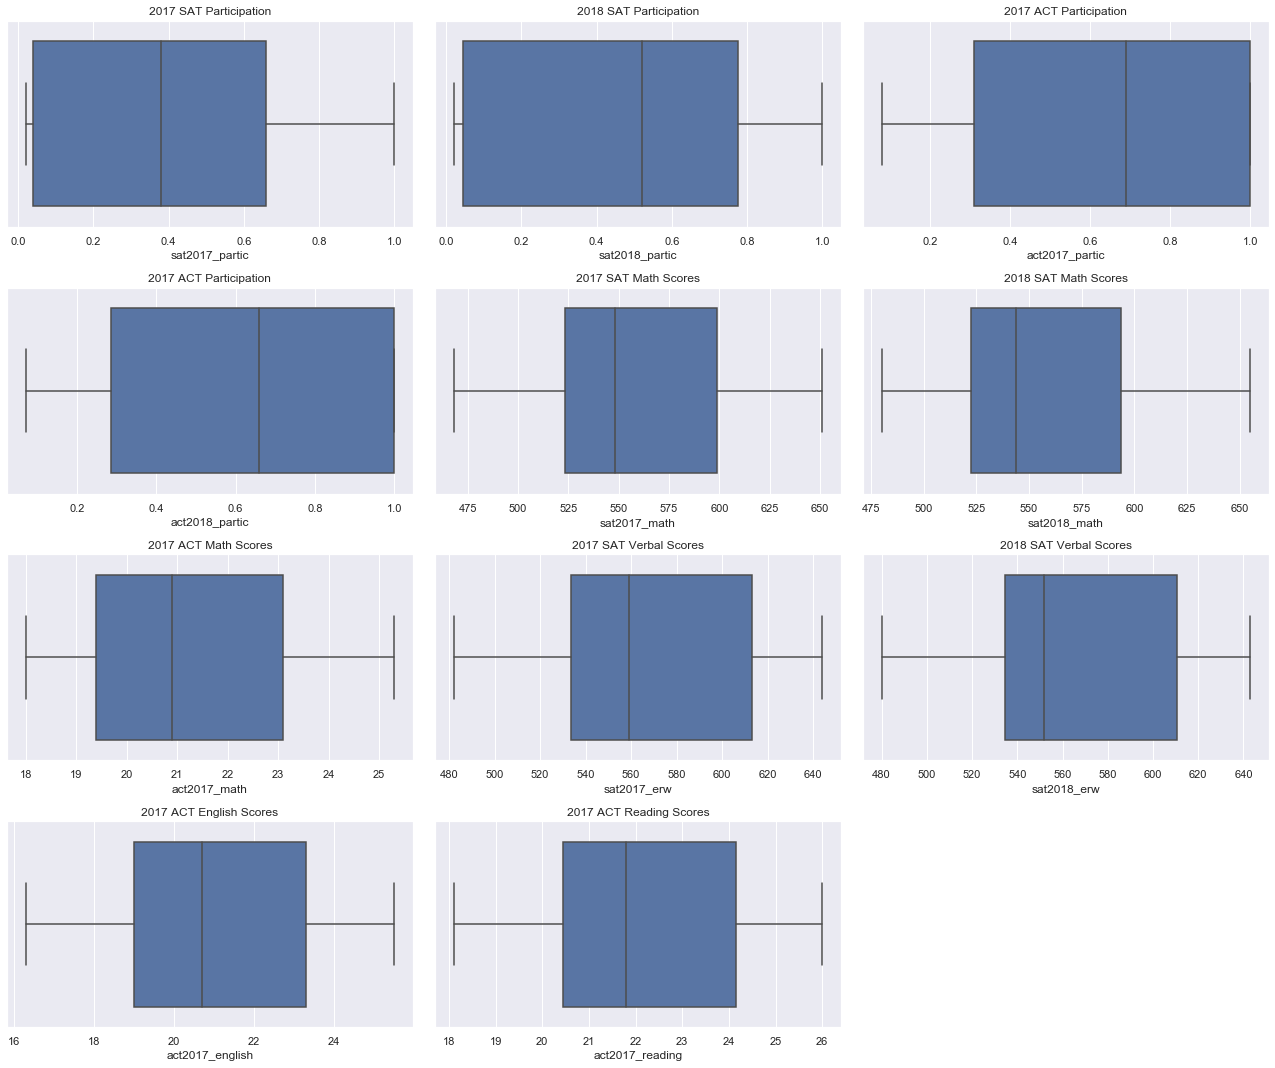

In [262]:
# Plot Box Plots

plt.figure(figsize=(18, 15))
plt.subplot(4,3,1)
sns.boxplot(combined_2017_18['sat2017_partic'])
plt.title('2017 SAT Participation')
plt.subplot(4,3,2)
sns.boxplot(combined_2017_18['sat2018_partic'])
plt.title('2018 SAT Participation')
plt.subplot(4,3,3)
sns.boxplot(combined_2017_18['act2017_partic'])
plt.title('2017 ACT Participation')
plt.subplot(4,3,4)
sns.boxplot(combined_2017_18['act2018_partic'])
plt.title('2017 ACT Participation')
plt.subplot(4,3,5)
sns.boxplot(combined_2017_18['sat2017_math'])
plt.title('2017 SAT Math Scores')
plt.subplot(4,3,6)
sns.boxplot(combined_2017_18['sat2018_math'])
plt.title('2018 SAT Math Scores')
plt.subplot(4,3,7)
sns.boxplot(combined_2017_18['act2017_math'])
plt.title('2017 ACT Math Scores')
plt.subplot(4,3,8)
sns.boxplot(combined_2017_18['sat2017_erw'])
plt.title('2017 SAT Verbal Scores')
plt.subplot(4,3,9)
sns.boxplot(combined_2017_18['sat2018_erw'])
plt.title('2018 SAT Verbal Scores')
plt.subplot(4,3,10)
sns.boxplot(combined_2017_18['act2017_english'])
plt.title('2017 ACT English Scores')
plt.subplot(4,3,11)
sns.boxplot(combined_2017_18['act2017_reading'])
plt.title('2017 ACT Reading Scores')
plt.tight_layout();

# Code adapted from GA DSI lesson 2.02 principles-of-visualization

In [263]:
# Interpretation:

# Scores, not surprisingly, seem to be more normally distributed, while the variance

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

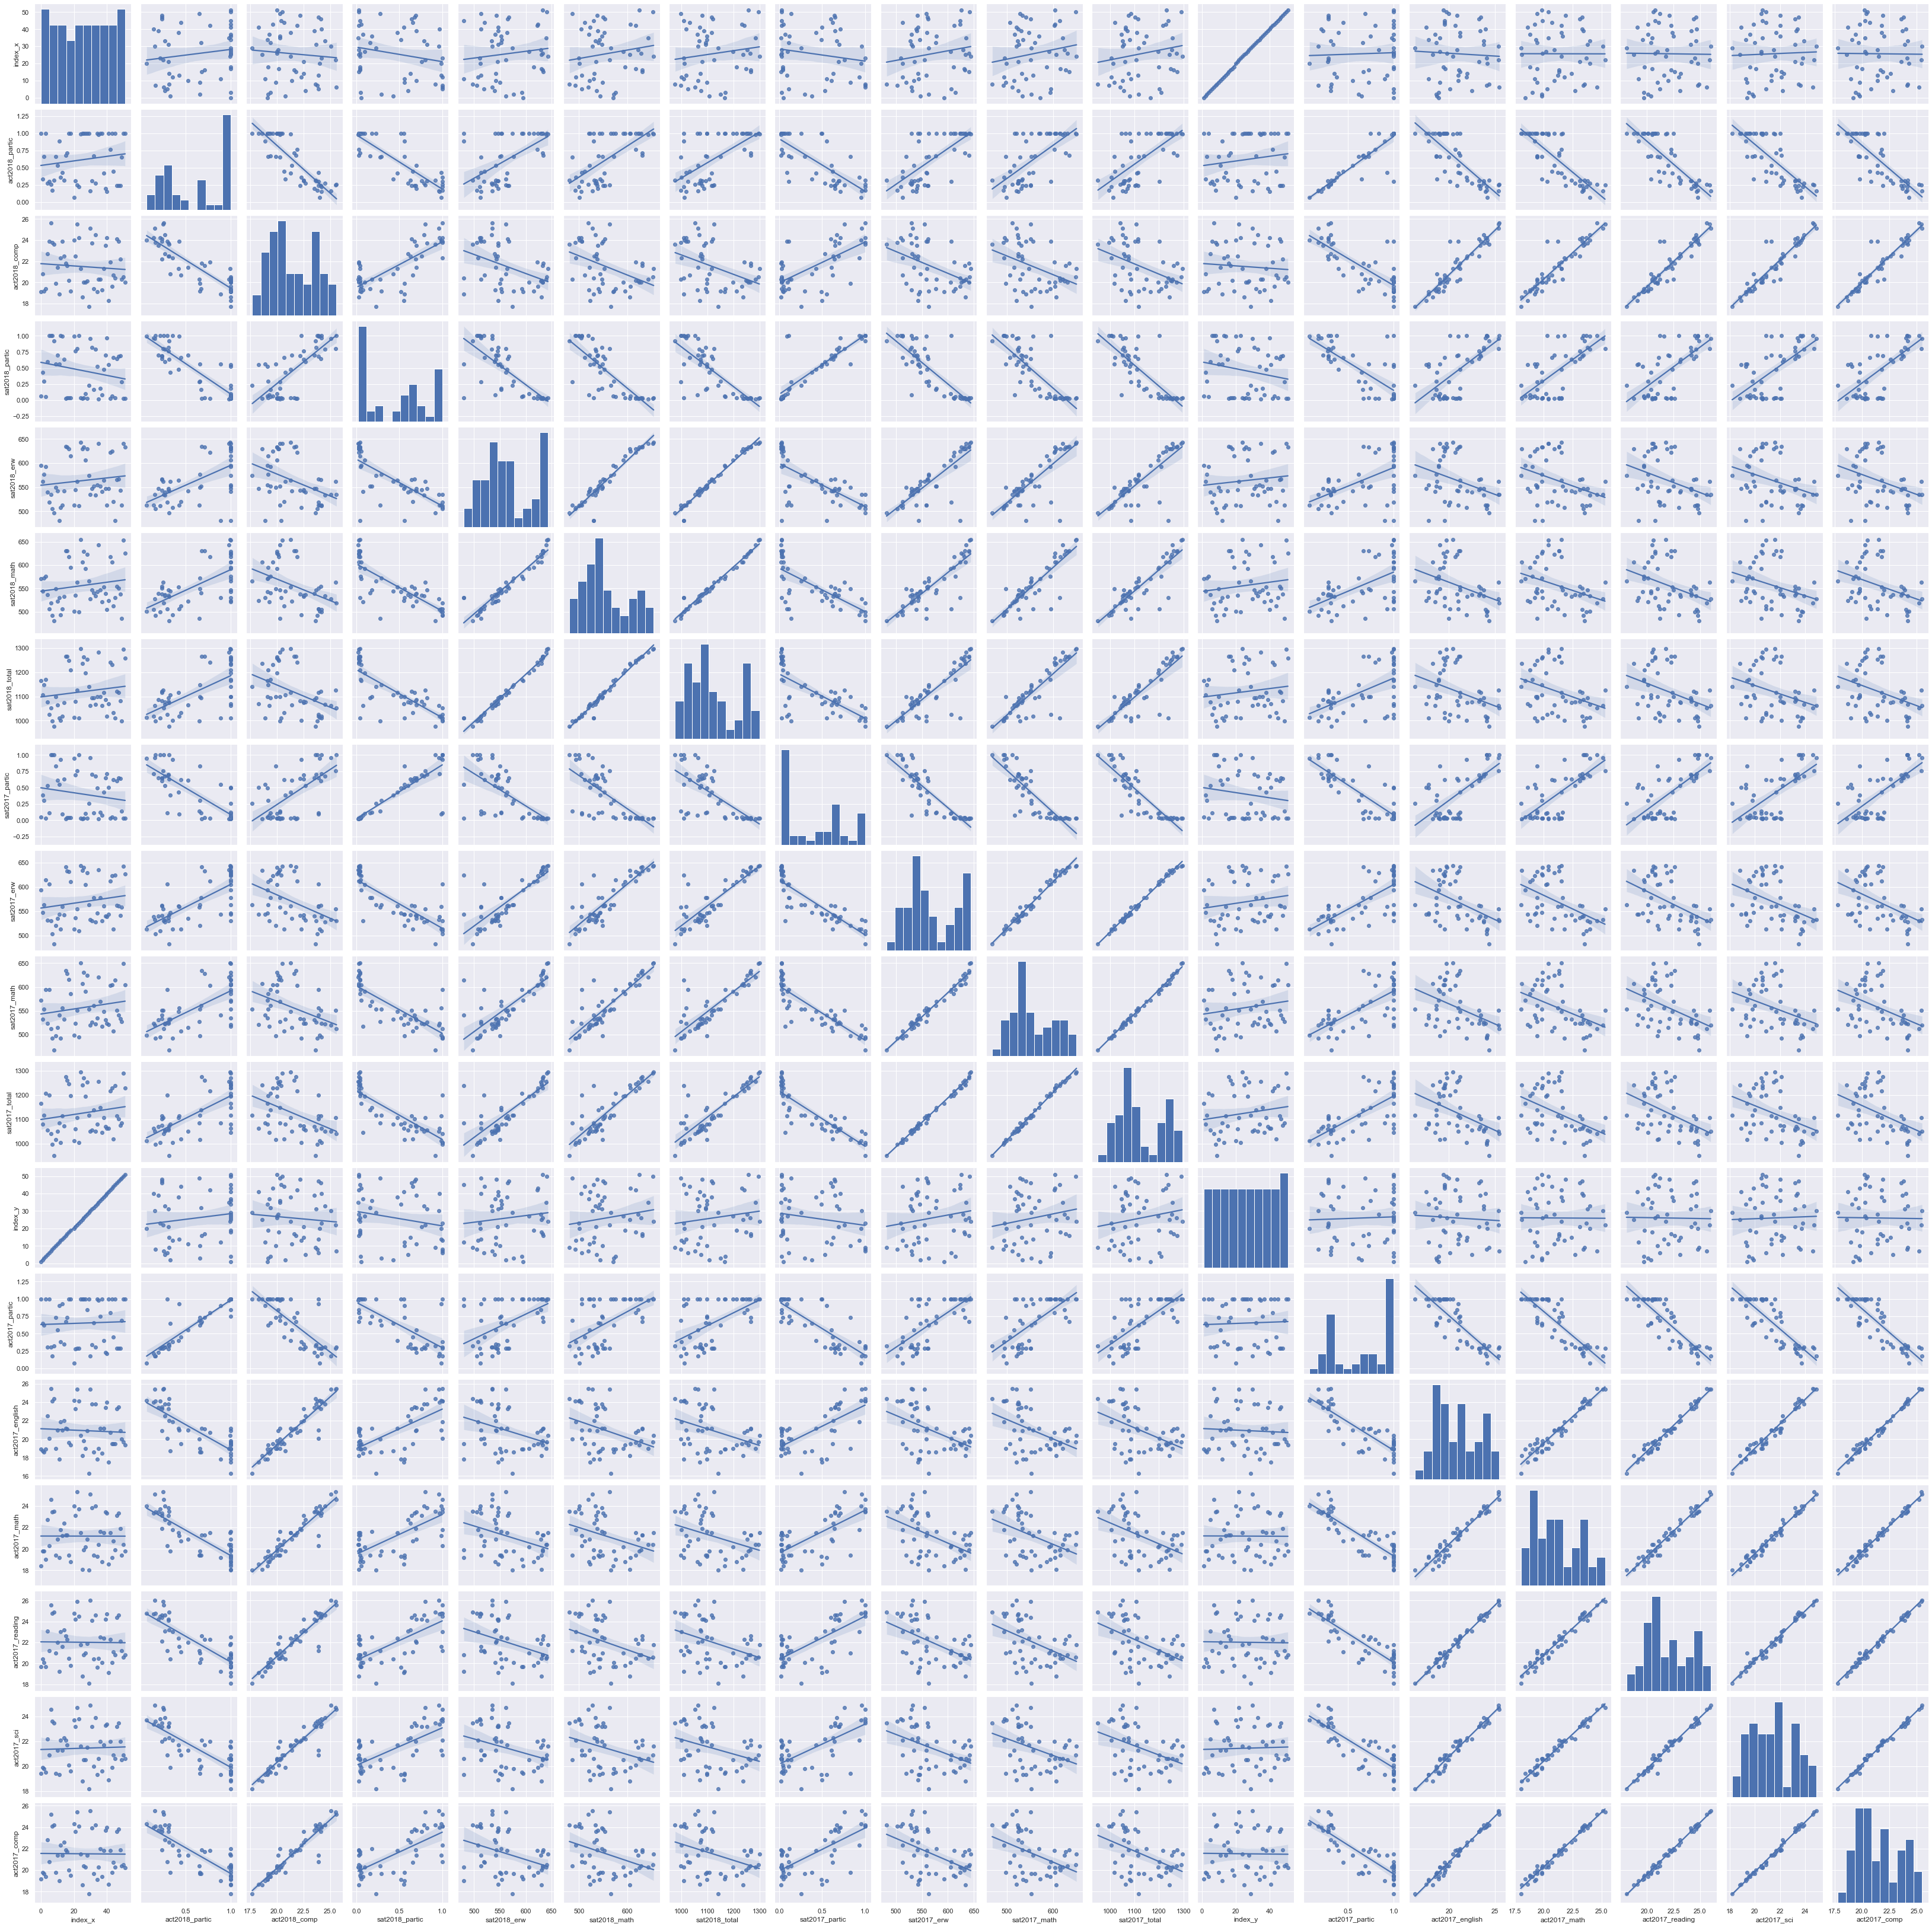

In [266]:
sns.pairplot(combined_2017_18, kind='reg');

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [ ]:
# Upload

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code: